<a href="https://colab.research.google.com/github/shettyarjun/placement_prediction/blob/main/pp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from sklearn.decomposition import PCA

from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/grand_place (1).csv')

In [ ]:
# Getting to know the shape of data
dataframe.shape

(23, 9)

In [ ]:
# Showing the first 5 rows of the dataset
dataframe.head()

,aptitude_marks,10th_marks,12th_marks,degree_marks,internship,projects,backlogs,leetcode_question,placement_chance
0,60,65,60,62,1,2,4,25,55
1,75,80,78,75,3,4,1,150,70
2,55,70,68,60,0,2,3,20,45
3,80,85,82,80,4,6,1,200,85
4,65,68,70,68,1,2,3,90,60


In [ ]:
# # prompt: Using dataframe dataframe:

# # Create a scatter plot with the following specifications:
# # - X-axis: High school marks
# # - Y-axis: College marks
# # - Color-coded by Branch
# # - Size of the points determined by Backlogs

# import altair as alt

# chart = alt.Chart(dataframe).mark_circle().encode(
#     x = alt.X("High school marks"),
#     y = alt.Y("College marks"),
#     color = alt.Color("Branch"),
#     size = alt.Size("Backlogs")
# ).interactive()

# chart


In [ ]:
dataframe.sample(4)

,aptitude_marks,10th_marks,12th_marks,degree_marks,internship,projects,backlogs,leetcode_question,placement_chance
20,80,82,82,80,4,5,0,500,96
3,80,85,82,80,4,6,1,200,85
16,60,62,65,62,2,3,3,45,55
11,80,80,82,82,4,5,0,190,85


In [ ]:
dataframe.dtypes

aptitude_marks       int64
10th_marks           int64
12th_marks           int64
degree_marks         int64
internship           int64
projects             int64
backlogs             int64
leetcode_question    int64
placement_chance     int64
dtype: object

In [ ]:
# Getting to know the detailed information of the columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   aptitude_marks     23 non-null     int64
 1   10th_marks         23 non-null     int64
 2   12th_marks         23 non-null     int64
 3   degree_marks       23 non-null     int64
 4   internship         23 non-null     int64
 5   projects           23 non-null     int64
 6   backlogs           23 non-null     int64
 7   leetcode_question  23 non-null     int64
 8   placement_chance   23 non-null     int64
dtypes: int64(9)
memory usage: 1.7 KB


In [ ]:
# Statistical Descriptions of the numerical values in the dataset
dataframe.describe()

,aptitude_marks,10th_marks,12th_marks,degree_marks,internship,projects,backlogs,leetcode_question,placement_chance
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,65.217391,70.347826,70.434783,69.260870,2.000000,3.173913,2.391304,157.000000,66.521739
std,13.856264,10.869510,10.517631,10.596815,1.445998,1.613922,1.725191,168.084665,20.925994
min,40.000000,52.000000,55.000000,50.000000,0.000000,1.000000,0.000000,8.000000,30.000000
25%,57.500000,62.000000,60.000000,61.000000,1.000000,2.000000,1.000000,29.500000,52.500000
50%,65.000000,70.000000,70.000000,68.000000,2.000000,3.000000,3.000000,90.000000,65.000000
75%,75.000000,80.000000,78.000000,78.000000,3.000000,4.000000,4.000000,225.000000,87.000000
max,85.000000,88.000000,88.000000,88.000000,4.000000,6.000000,5.000000,550.000000,96.000000


In [ ]:
# Getting to know the correlation between the target column and other features.
dataframe.corr()['placement_chance']

aptitude_marks       0.871980
10th_marks           0.834295
12th_marks           0.796523
degree_marks         0.822771
internship           0.815687
projects             0.789919
backlogs            -0.815502
leetcode_question    0.854404
placement_chance     1.000000
Name: placement_chance, dtype: float64

In [ ]:
# missing values
dataframe.isnull().sum()

aptitude_marks       0
10th_marks           0
12th_marks           0
degree_marks         0
internship           0
projects             0
backlogs             0
leetcode_question    0
placement_chance     0
dtype: int64

In [ ]:
# duplicate rows
print(dataframe.duplicated().sum())

#drop duplicates
dataframe.drop_duplicates(inplace=True)

1


In [ ]:
# Check if the duplicate rows are removed
print(dataframe.duplicated().sum())

0


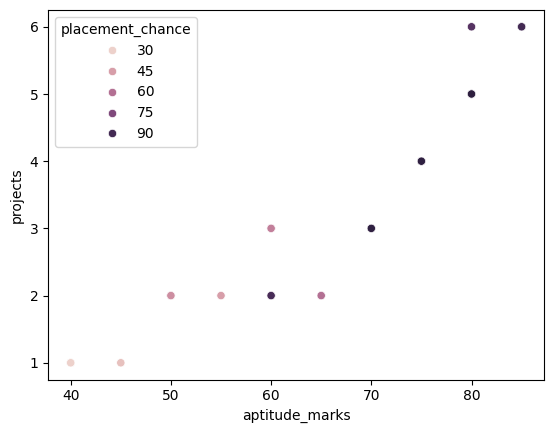

In [ ]:
# prompt: plot graph with aptitude  marks as x and project as y and color as placement chances

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=dataframe,
    x="aptitude_marks",
    y="projects",
    hue="placement_chance",
)
plt.show()


In [ ]:
# Filter for placed students
placed_data = dataframe[dataframe['placement_chance'] > 0]

# Get the number of Projects for placed students
Projects_placed = placed_data['projects']

# Find the highest and lowest number of Projects
max_Projects = Projects_placed.max()
min_Projects = Projects_placed.min()

# Print the highest and lowest number of Projects
print("Highest number of Projects among placed students:", max_Projects)
print("Lowest number of Projects among placed students:", min_Projects)


Highest number of Projects among placed students: 6
Lowest number of Projects among placed students: 1


In [ ]:
# Printing the Maximum and Minimum number of internships done by the student who is placed.
max_internships_placed = placed_data['internship'].max()
min_internships_placed = placed_data['internship'].min()

print("Max internship Done by the Placed Student:", max_internships_placed)
print("Min internship Done by the Placed Person:", min_internships_placed)

# Printing the Maximum and Minimum number of students who did the max internship and the minimum number of internships.
max_internship_count = placed_data['internship'].value_counts().max()
min_internship_count = placed_data['internship'].value_counts().min()

print("No of students who did max internship and are placed:", max_internship_count)
print("No of students who did min internship and are placed:", min_internship_count)


Max internship Done by the Placed Student: 4
Min internship Done by the Placed Person: 0
No of students who did max internship and are placed: 6
No of students who did min internship and are placed: 3


In [ ]:
# Printing the Maximum and Minimum number of aptitude_marks obtained by the student who is placed.
max_aptitude_marks_placed = placed_data['aptitude_marks'].max()
min_aptitude_marks_placed = placed_data['aptitude_marks'].min()

print("Max aptitude_marks of Placed Student:", max_aptitude_marks_placed)
print("Min aptitude_marks of Placed Student:", min_aptitude_marks_placed)

# Printing the Maximum and Minimum number of students who got the max aptitude_marks and the minimum aptitude_marks who are placed.
max_aptitude_marks_count = placed_data[placed_data['aptitude_marks'] == max_aptitude_marks_placed].shape[0]
min_aptitude_marks_count = placed_data[placed_data['aptitude_marks'] == min_aptitude_marks_placed].shape[0]

print("No of students with max aptitude_marks and are placed:", max_aptitude_marks_count)
print("No of students with min aptitude_marks and are placed:", min_aptitude_marks_count)


Max aptitude_marks of Placed Student: 85
Min aptitude_marks of Placed Student: 40
No of students with max aptitude_marks and are placed: 2
No of students with min aptitude_marks and are placed: 2


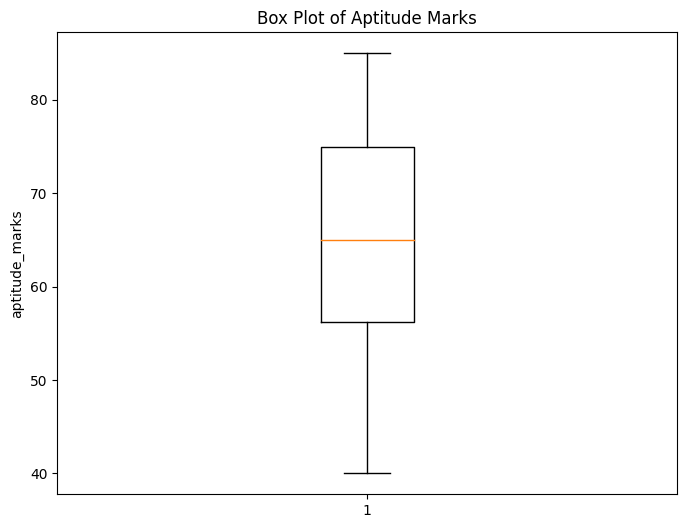

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'dataframe' is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(dataframe['aptitude_marks'])
plt.ylabel('aptitude_marks')
plt.title('Box Plot of Aptitude Marks')
plt.show()


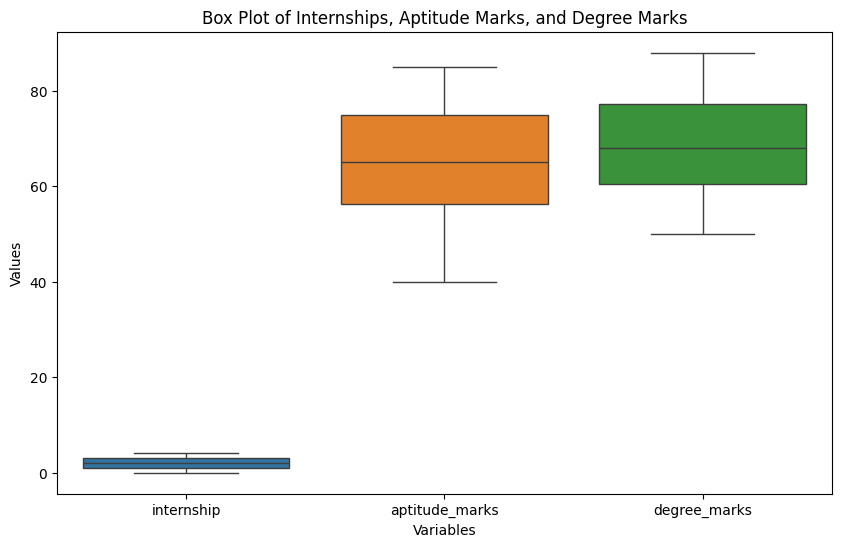

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataframe' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataframe[['internship', 'aptitude_marks', 'degree_marks']])
plt.title('Box Plot of Internships, Aptitude Marks, and Degree Marks')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()


In [ ]:
X = dataframe.iloc[:,0:7]
y = dataframe.iloc[:,-1]
X


,aptitude_marks,10th_marks,12th_marks,degree_marks,internship,projects,backlogs
0,60,65,60,62,1,2,4
1,75,80,78,75,3,4,1
2,55,70,68,60,0,2,3
3,80,85,82,80,4,6,1
4,65,68,70,68,1,2,3
5,85,85,88,87,4,6,0
6,40,55,55,58,0,1,5
7,60,62,65,62,2,3,3
8,75,78,78,78,3,4,1
9,50,58,60,58,1,2,4


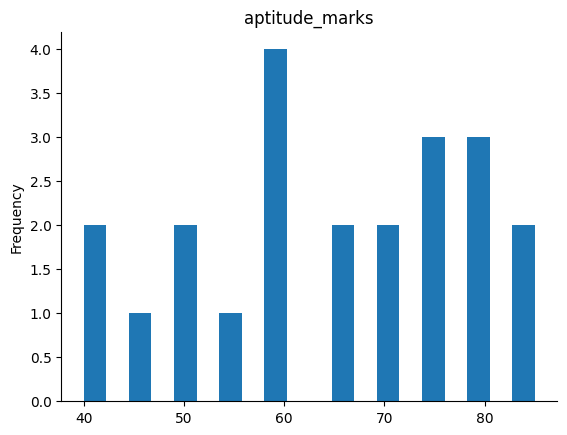

In [ ]:
# @title aptitude_marks

from matplotlib import pyplot as plt
X['aptitude_marks'].plot(kind='hist', bins=20, title='aptitude_marks')
plt.gca().spines[['top', 'right',]].set_visible(False)

load the trained model,without training again


In [ ]:
import joblib

# Load the trained Random Forest model
best_rf_model = joblib.load("random_forest_model.pkl")

# Load the scaler for feature scaling
scaler = joblib.load("scaler.pk2")


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
dataset = np.genfromtxt("/content/drive/MyDrive/grand_place (1).csv", delimiter=",", skip_header=True)

# Split dataset into features and target
X = dataset[:, :-1]  # Features
y = dataset[:, -1]   # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get best Random Forest model
best_rf_model = grid_search.best_estimator_

# Evaluate model using cross-validation
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print("Cross-validated Mean Squared Error:", cv_mse)

# Make predictions
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Mean Squared Error:", mse)

# Get feature importance
feature_importance = best_rf_model.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
print("Feature Importance:")
for i in sorted_indices:
    print(f"Feature {i+1}: {feature_importance[i]}")


Cross-validated Mean Squared Error: 34.49353333333334
Random Forest Mean Squared Error: 16.246459999999992
Feature Importance:
Feature 8: 0.7131003854950301
Feature 3: 0.06830321515945743
Feature 1: 0.05663524699774306
Feature 5: 0.04281671631069419
Feature 2: 0.04269708298224992
Feature 4: 0.03301672858981356
Feature 6: 0.02389372442774931
Feature 7: 0.019536900037262387


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming you have trained your Random Forest model and scaler
# best_rf_model = RandomForestRegressor(n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
# scaler = StandardScaler()
# Train your model and scaler here

# Save the trained Random Forest model
joblib.dump(best_rf_model, "random_forest_model.pk2")

# Save the scaler for feature scaling
joblib.dump(scaler, "scaler.pk2")


['scaler.pk2']

In [ ]:
# import os

# # Get the current working directory
# current_directory = os.getcwd()

# # List all files in the current directory
# files_in_directory = os.listdir(current_directory)

# # Filter out the files with .pkl extension
# saved_model_files = [file for file in files_in_directory if file.endswith(".pkl")]
# #
# # Print the paths of the saved model files
# for file in saved_model_files:
#     print(os.path.join(current_directory, file))


In [ ]:
9
# Function to predict placement chance
def predict_placement_chance(aptitude_marks, tenth_marks, twelfth_marks, degree_marks,
                             internship, projects, backlogs, leetcode):
    # Scale the input features
    input_features = np.array([[aptitude_marks, tenth_marks, twelfth_marks, degree_marks,
                                 internship, projects, backlogs, leetcode]])
    input_features_scaled = scaler.transform(input_features)

    # Make prediction
    placement_chance = best_rf_model.predict(input_features_scaled)[0]

    # Convert placement chance to percentage
    placement_chance_percentage = max(0, min(100, placement_chance))

    return placement_chance_percentage

# Function to get user input and predict placement chance
def predict_placement_chance_from_user_input():
    # Get user input for different features
    aptitude_marks = float(input("Enter aptitude marks (0-100): "))
    tenth_marks = float(input("Enter 10th marks (0-100): "))
    twelfth_marks = float(input("Enter 12th marks (0-100): "))
    degree_marks = float(input("Enter degree marks (0-100): "))
    internship = float(input("Enter internship (0-5): "))
    projects = float(input("Enter projects (0-7): "))
    backlogs = float(input("Enter backlogs (0-5): "))
    leetcode = float(input("Enter LeetCode questions (0-550): "))

    # Predict placement chance
    placement_chance_percentage = predict_placement_chance(aptitude_marks, tenth_marks, twelfth_marks, degree_marks,
                                                             internship, projects, backlogs, leetcode)

    print(f"\nPredicted Placement Chance: {placement_chance_percentage:.2f}%")

# Main function
if __name__ == "__main__":
    # Get user input and predict placement chance
    predict_placement_chance_from_user_input()

Enter aptitude marks (0-100): 90
Enter 10th marks (0-100): 90
Enter 12th marks (0-100): 90
Enter degree marks (0-100): 90
Enter internship (0-5): 3
Enter projects (0-7): 6
Enter backlogs (0-5): 0
Enter LeetCode questions (0-550): 300

Predicted Placement Chance: 94.29%
